In [253]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Phase 1: Data Preprocessing

In [129]:
df = pd.read_csv("CCR.csv")
df.columns = df.columns.str.strip()
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [147]:
# Obtaining only relevant features/columns 
ddf = df.iloc[:,3:]
#ddf = df.drop(columns=["RowNumber"], inplace=True)
ddf.head()

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [139]:
# Label Encoding gender, female is 0, male is 1
label_encoder = LabelEncoder()
ddf["Gender"] = label_encoder.fit_transform(ddf["Gender"])
ddf.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,0,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,0,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [115]:
# One Hot Encoding geography and card type as there is more than 2 options in column
dddf = pd.get_dummies(ddf, columns=["Geography", "Card Type"], drop_first=False)
dddf.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,2,464,True,False,False,True,False,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1,3,456,False,False,True,True,False,False,False
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,3,377,True,False,False,True,False,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,5,350,True,False,False,False,True,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,5,425,False,False,True,False,True,False,False


In [159]:
# Converting all columns to int/numeric, from true/false etc.
# Only issue is decimals are rounded down, may be inaccurate
for i in dddf.columns:
    dddf[i] = dddf[i].astype(int)

dddf

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,0,42,2,0,1,1,1,101348,1,1,2,464,1,0,0,1,0,0,0
1,608,0,41,1,83807,1,0,1,112542,0,1,3,456,0,0,1,1,0,0,0
2,502,0,42,8,159660,3,1,0,113931,1,1,3,377,1,0,0,1,0,0,0
3,699,0,39,1,0,2,0,0,93826,0,0,5,350,1,0,0,0,1,0,0
4,850,0,43,2,125510,1,1,1,79084,0,0,5,425,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0,2,1,0,96270,0,0,1,300,1,0,0,1,0,0,0
9996,516,1,35,10,57369,1,1,1,101699,0,0,5,771,1,0,0,0,0,1,0
9997,709,0,36,7,0,1,0,1,42085,1,1,3,564,1,0,0,0,0,0,1
9998,772,1,42,3,75075,2,1,0,92888,1,1,2,339,0,1,0,0,1,0,0


In [ ]:
# Phase 2: Feature selection via mutual information

In [165]:
# Defining features and target
X = dddf.drop(["Exited"], axis=1)
y = dddf["Exited"]

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [187]:
# Exited = 1 implies customers have left
left = y.value_counts()

In [213]:
# Creating mutual information values
mi_scores = mutual_info_classif(X, y)
mi_df = pd.DataFrame({"Feature": X.columns, "MI Score": mi_scores})
mi_df = mi_df.sort_values(by="MI Score", ascending=False)

mi_df

,Feature,MI Score
9,Complain,0.496729
2,Age,0.071642
5,NumOfProducts,0.063775
13,Geography_Germany,0.018009
7,IsActiveMember,0.010406
4,Balance,0.009947
0,CreditScore,0.006458
1,Gender,0.005447
15,Card Type_DIAMOND,0.005347
10,Satisfaction Score,0.004611


In [257]:
# New dataframe with only top 15 mi ranking values
top_features = mi_df["Feature"].head(15).tolist()
X_top = X[top_features]
X_top.head(20)

,Complain,Age,NumOfProducts,Geography_Germany,IsActiveMember,Balance,CreditScore,Gender,Card Type_DIAMOND,Satisfaction Score,Point Earned,Card Type_PLATINUM,Geography_France,EstimatedSalary,Card Type_SILVER
0,1,42,1,0,1,0,619,0,1,2,464,0,1,101348,0
1,1,41,1,0,1,83807,608,0,1,3,456,0,0,112542,0
2,1,42,3,0,0,159660,502,0,1,3,377,0,1,113931,0
3,0,39,2,0,0,0,699,0,0,5,350,0,1,93826,0
4,0,43,1,0,1,125510,850,0,0,5,425,0,0,79084,0
5,1,44,2,0,0,113755,645,1,1,5,484,0,0,149756,0
6,0,50,2,0,1,0,822,1,0,2,206,0,1,10062,1
7,1,29,4,1,0,115046,376,0,1,2,282,0,0,119346,0
8,0,44,2,0,1,142051,501,1,0,3,251,0,1,74940,0
9,0,27,1,0,1,134603,684,1,0,3,342,0,1,71725,0


In [221]:
# Phase 3: Model Training and Evaluation

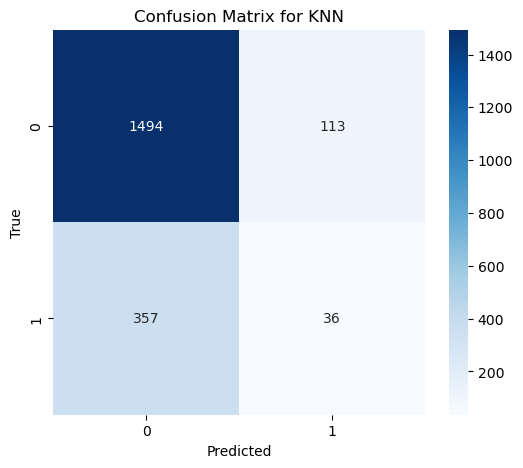

=== KNN ===
Confusion Matrix:
 [[1494  113]
 [ 357   36]]
Accuracy: 0.765
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.93      0.86      1607
           1       0.24      0.09      0.13       393

    accuracy                           0.77      2000
   macro avg       0.52      0.51      0.50      2000
weighted avg       0.70      0.77      0.72      2000





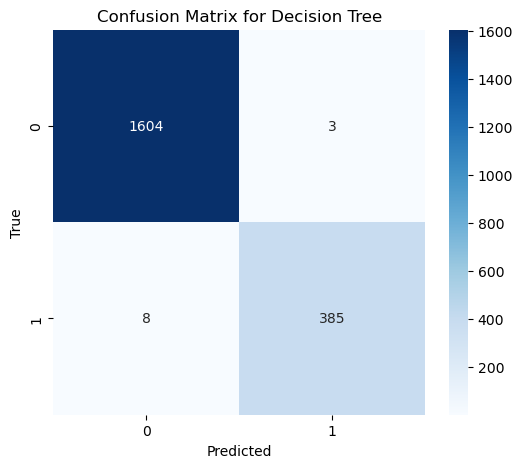

=== Decision Tree ===
Confusion Matrix:
 [[1604    3]
 [   8  385]]
Accuracy: 0.9945
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       0.99      0.98      0.99       393

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000





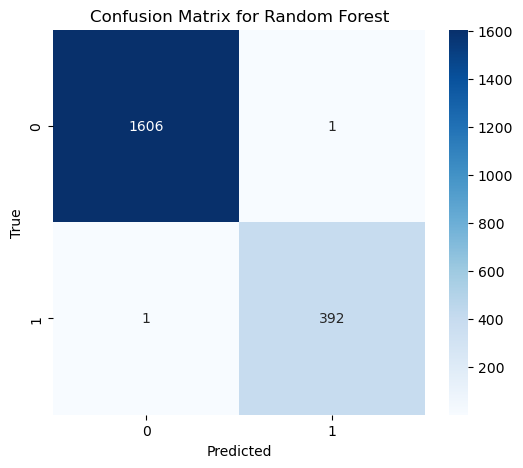

=== Random Forest ===
Confusion Matrix:
 [[1606    1]
 [   1  392]]
Accuracy: 0.999
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000





In [251]:
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=42)

models = {
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=88),
    "Random Forest": RandomForestClassifier(random_state=88)
}

accuracy_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()    

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = accuracy

    print(f"=== {name} ===")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n")    

In [255]:
# Assuming X_top and y are already defined
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=42)

models = {
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Create folders to save outputs
os.makedirs("confusion_matrices", exist_ok=True)
os.makedirs("model_reports", exist_ok=True)

accuracy_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # === SAVE CONFUSION MATRIX PLOT AS PNG ===
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.savefig(f"confusion_matrices/{name.replace(' ', '_')}_confusion_matrix.png")
    plt.close()

    # === SAVE TEXT REPORT TO TXT FILE ===
    with open(f"model_reports/{name.replace(' ', '_')}_report.txt", "w") as f:
        f.write(f"=== {name} ===\n")
        f.write("Confusion Matrix:\n")
        f.write(np.array2string(cm))
        f.write("\n\nAccuracy:\n")
        f.write(f"{accuracy:.4f}\n\n")
        f.write("Classification Report:\n")
        f.write(report)

    # Keep accuracy for optional plotting
    accuracy_scores[name] = accuracy